In [ ]:
# 라이브러리 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#데이터 불러오기
from google.colab import files
uploaded = files.upload()

Saving vgames2.csv to vgames2.csv


In [ ]:
df = pd.read_csv('vgames2.csv')

In [ ]:
#데이터
df.head(5)

,Unnamed: 0,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,1,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,2,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
3,4,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
4,5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04


In [ ]:
df.shape

(16598, 10)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   16598 non-null  int64  
 1   Name         16598 non-null  object 
 2   Platform     16598 non-null  object 
 3   Year         16327 non-null  float64
 4   Genre        16548 non-null  object 
 5   Publisher    16540 non-null  object 
 6   NA_Sales     16598 non-null  object 
 7   EU_Sales     16598 non-null  object 
 8   JP_Sales     16598 non-null  object 
 9   Other_Sales  16598 non-null  object 
dtypes: float64(1), int64(1), object(8)
memory usage: 1.3+ MB


In [ ]:
# 데이터 정제
df.isnull().sum()

Unnamed: 0       0
Name             0
Platform         0
Year           271
Genre           50
Publisher       58
NA_Sales         0
EU_Sales         0
JP_Sales         0
Other_Sales      0
dtype: int64

In [ ]:
#결측값을 결측값의 뒷 행의 값으로 채우기 // 좋은 방법 아니지만 최선이었음.
df=df.fillna(method='bfill')

In [ ]:
#결측값 다시 확인 
df.isnull().sum()

Unnamed: 0     0
Name           0
Platform       0
Year           0
Genre          0
Publisher      0
NA_Sales       0
EU_Sales       0
JP_Sales       0
Other_Sales    0
dtype: int64

In [ ]:
df.head(5)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
3,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04


In [ ]:
# Unnamed: 0 행 삭제
df=df.drop('Unnamed: 0', axis=1)

In [ ]:
df['NA_Sales'] = df['NA_Sales'].astype(str).str.replace('K','')

In [ ]:
df['NA_Sales'] = df['NA_Sales'].astype(str).str.replace('M','')

In [ ]:
df['NA_Sales']=df['NA_Sales'].astype('float')

In [ ]:
df['NA_Sales']

0        0.04
1        0.17
2        0.00
3        0.04
4        0.12
         ... 
16593    0.15
16594    0.01
16595    0.44
16596    0.05
16597    0.00
Name: NA_Sales, Length: 16598, dtype: float64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         16598 non-null  object 
 1   Platform     16598 non-null  object 
 2   Year         16598 non-null  float64
 3   Genre        16598 non-null  object 
 4   Publisher    16598 non-null  object 
 5   NA_Sales     16598 non-null  float64
 6   EU_Sales     16598 non-null  object 
 7   JP_Sales     16598 non-null  object 
 8   Other_Sales  16598 non-null  object 
dtypes: float64(2), object(7)
memory usage: 1.1+ MB


In [ ]:
# 북미 판매량 중 'K'가 포함된 값 찾기
k=df['NA_Sales'].str.contains('K')

In [ ]:
# 'K'를 모두 ''(공백)으로 변경해줌
df['NA_Sales'] = df['NA_Sales'].astype(str).str.replace('K','')

In [ ]:
# 북미 판매량 컬럼의 데이터 타입을 실수 타입으로 변경
df['NA_Sales']=df['NA_Sales'].astype('float')

In [ ]:
# 북미 판매량 중 'M'이 포함된 값 찾기
m=df['NA_Sales'].str.contains('M')

In [ ]:
# 'M'을 모두 ''(공백)으로 변경해줌
df['NA_Sales'] = df['NA_Sales'].astype(str).str.replace('M','')

In [ ]:
# K가 포함된 값의 인덱스 찾기
df[k].index

Int64Index([   10,    45,   145,   878,  1086,  1359,  1456,  1475,  1838,
             1922,  1964,  1971,  2673,  2924,  3262,  3328,  3498,  4471,
             4617,  4978,  5032,  5175,  5284,  5296,  5334,  5768,  6055,
             6086,  6115,  6150,  6153,  6203,  6545,  6595,  6694,  6929,
             7023,  7049,  7109,  7192,  7403,  7435,  7774,  7881,  8134,
             8189,  8235,  8239,  8579,  8689,  8842,  8872,  9020,  9257,
             9437,  9456,  9566,  9791,  9829, 10301, 10357, 10358, 10544,
            10823, 11563, 11992, 11996, 12107, 12158, 12240, 12332, 12410,
            12517, 12745, 12876, 13057, 13341, 13557, 13798, 13887, 13935,
            14180, 14292, 14347, 14410, 14446, 14630, 14757, 15088, 15107,
            15111, 15340, 15430, 15597, 15622, 15647, 16194, 16330, 16492,
            16578],
           dtype='int64')

In [ ]:
# M이 포함된 값의 인덱스 찾기
df[m].index

Int64Index([  447,   458,   577,   625,   672,   767,   955,  1046,  1358,
             1469,  1656,  1882,  1931,  2158,  2495,  2757,  2958,  2960,
             2997,  3078,  3145,  3251,  3832,  3861,  4010,  4070,  4111,
             4581,  4754,  5060,  5312,  5737,  6303,  6661,  6763,  6883,
             7260,  7499,  7597,  7710,  7884,  8058,  8156,  8632,  8860,
             8894,  8949,  8954,  9548,  9563,  9630,  9633,  9667,  9671,
             9718,  9821, 10007, 10020, 10224, 10337, 10653, 10680, 10903,
            10913, 11019, 11124, 11245, 11722, 12109, 12351, 12404, 12417,
            12462, 12600, 12698, 12738, 12872, 12945, 13246, 13615, 13710,
            13719, 13870, 13883, 13896, 14079, 14100, 14242, 14474, 14559,
            14839, 15149, 15385, 15481, 15708, 15986, 16152, 16169, 16408,
            16482],
           dtype='int64')

In [ ]:
# K가 포함된 인덱스(위치)들을 o라고 지정
o=df[k].index

In [ ]:
# NA_Sales의 'K'가 포함된 위치에 있는 값들을 d라는 시리즈로 지정
d=df['NA_Sales'][o]

In [ ]:
#시리즈 d를 리스트 형태로 만듬
d=d.to_list()

In [ ]:
# lambda를 사용, 0.001을 곱함으로써 정상값으로 만듬
result2 = list(map((lambda x: x * 0.001), d))

In [ ]:
result2

[0.48,
 0.06,
 0.0,
 0.0,
 0.0,
 0.49,
 0.24,
 0.0,
 0.15,
 0.0,
 4.1,
 5.17,
 0.02,
 0.03,
 0.05,
 0.07,
 0.19,
 1.21,
 0.35000000000000003,
 1.61,
 0.1,
 0.0,
 0.17,
 1.21,
 0.0,
 0.04,
 0.02,
 0.06,
 0.0,
 0.15,
 0.0,
 0.45,
 0.0,
 0.22,
 0.31,
 1.61,
 0.8200000000000001,
 0.02,
 0.08,
 0.29,
 0.0,
 0.13,
 0.02,
 0.15,
 0.1,
 0.0,
 0.06,
 0.05,
 0.0,
 0.13,
 0.12,
 0.05,
 0.29,
 0.02,
 0.0,
 0.06,
 0.0,
 1.78,
 2.93,
 0.77,
 0.01,
 0.28,
 0.05,
 0.54,
 0.0,
 0.55,
 2.0100000000000002,
 0.0,
 0.1,
 0.0,
 0.01,
 0.0,
 0.77,
 0.02,
 0.34,
 0.09,
 0.22,
 0.6,
 0.09,
 0.13,
 2.57,
 0.03,
 0.04,
 0.09,
 0.04,
 0.0,
 0.0,
 0.0,
 0.27,
 0.42,
 0.0,
 0.0,
 0.28,
 0.0,
 0.03,
 0.0,
 0.12,
 0.72,
 0.47000000000000003,
 0.32]

In [ ]:
df['NA_Sales'][o]=result2

<ipython-input-21-018aa55fdeba>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['NA_Sales'][o]=result2


In [ ]:
# 위와 동일하므로 설명 생략
n=df['EU_Sales'].str.contains('K')

In [ ]:
p=df[n].index

In [ ]:
df['EU_Sales'] = df['EU_Sales'].astype(str).str.replace('K','')

In [ ]:
df['EU_Sales'] = df['EU_Sales'].astype(str).str.replace('M','')

In [ ]:
z=df['EU_Sales'][p]

In [ ]:
z=z.to_list()

In [ ]:
df['EU_Sales']=df['EU_Sales'].astype('float')

In [ ]:
result3 = list(map((lambda x: x * 0.001), z))

In [ ]:
df['EU_Sales'][p]=result3

<ipython-input-32-5c2baf4f844d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['EU_Sales'][p]=result3


In [ ]:
j=df['JP_Sales'].str.contains('K')

In [ ]:
r=df[j].index

In [ ]:
df['JP_Sales'] = df['JP_Sales'].astype(str).str.replace('K','')

In [ ]:
df['JP_Sales'] = df['JP_Sales'].astype(str).str.replace('M','')

In [ ]:
w=df['JP_Sales'][r]

In [ ]:
w=w.to_list()

In [ ]:
df['JP_Sales']=df['JP_Sales'].astype('float')

In [ ]:
print(type(w))

<class 'list'>


In [ ]:
result4 = list(map((lambda x: x * 0.001), w))

In [ ]:
df['JP_Sales'][w]=result4

<ipython-input-42-baa5aacea802>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['JP_Sales'][w]=result4
/usr/local/lib/python3.9/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [ ]:
t=df['Other_Sales'].str.contains('K')

In [ ]:
y=df[t].index

In [ ]:
df['Other_Sales'] = df['Other_Sales'].astype(str).str.replace('K','')

In [ ]:
df['Other_Sales'] = df['Other_Sales'].astype(str).str.replace('M','')

In [ ]:
df.head(2)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01


In [ ]:
df['Other_Sales']=df['Other_Sales'].astype('float')

In [ ]:
u=df['Other_Sales'][y]

In [ ]:
u=u.to_list()

In [ ]:
result5 = list(map((lambda x: x * 0.001), u))

In [ ]:
df['Other_Sales'][y]=result5

<ipython-input-51-09120728e5ca>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Other_Sales'][y]=result5


In [ ]:
# 데이터 정리 완료
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         16598 non-null  object 
 1   Platform     16598 non-null  object 
 2   Year         16598 non-null  float64
 3   Genre        16598 non-null  object 
 4   Publisher    16598 non-null  object 
 5   NA_Sales     16598 non-null  float64
 6   EU_Sales     16598 non-null  float64
 7   JP_Sales     16598 non-null  float64
 8   Other_Sales  16598 non-null  float64
dtypes: float64(5), object(4)
memory usage: 1.1+ MB


In [ ]:
df.NA_Sales.describe()

count    16598.000000
mean         0.264667
std          0.816683
min          0.000000
25%          0.000000
50%          0.080000
75%          0.240000
max         41.490000
Name: NA_Sales, dtype: float64

In [ ]:
df.EU_Sales.describe()

count    16598.000000
mean         0.146652
std          0.505351
min          0.000000
25%          0.000000
50%          0.020000
75%          0.110000
max         29.020000
Name: EU_Sales, dtype: float64

In [ ]:
df.JP_Sales.describe()

count    16598.000000
mean         0.536736
std         23.933674
min          0.000000
25%          0.000000
50%          0.000000
75%          0.040000
max       2780.000000
Name: JP_Sales, dtype: float64

In [ ]:
df.Other_Sales.describe()

count    16598.000000
mean         0.048063
std          0.188588
min          0.000000
25%          0.000000
50%          0.010000
75%          0.040000
max         10.570000
Name: Other_Sales, dtype: float64

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
df.head(2)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0.0,0.0,0.00
1,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0.0,0.0,0.01


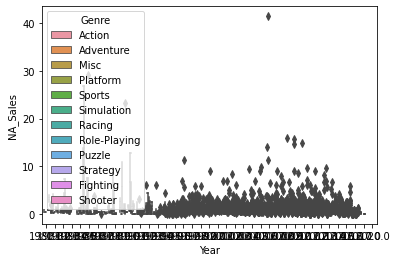

In [ ]:
sns.boxplot(x='Year',y='NA_Sales',hue='Genre',data=df)
plt.show()

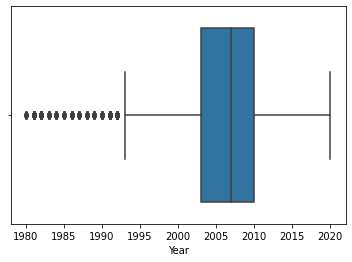

In [ ]:
sns.boxplot(x=df.Year);

In [ ]:
#Year 컬럼의 이상치 삭제
df=df.drop(index=df[df.Year<500].index)

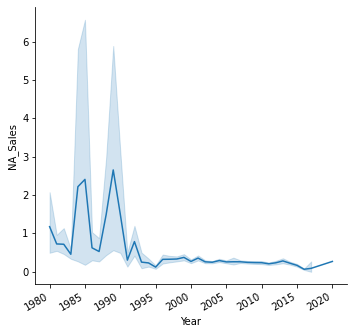

In [ ]:
g = sns.relplot(x="Year", y="NA_Sales", kind="line", data=df)
g.fig.autofmt_xdate()

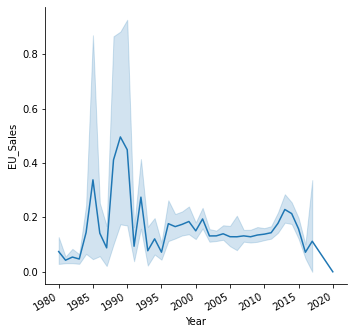

In [ ]:
g = sns.relplot(x="Year", y="EU_Sales", kind="line", data=df)
g.fig.autofmt_xdate()

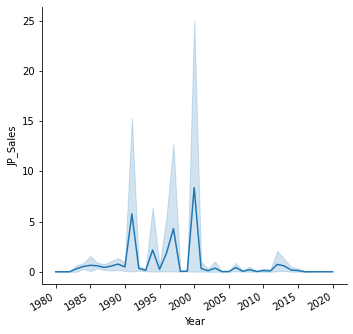

In [ ]:
g = sns.relplot(x="Year", y="JP_Sales", kind="line", data=df)
g.fig.autofmt_xdate()

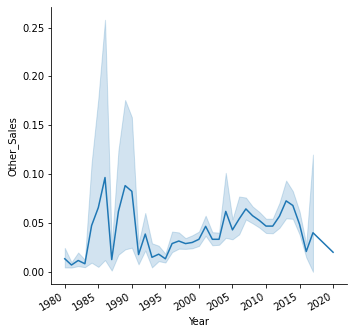

In [ ]:
g = sns.relplot(x="Year", y="Other_Sales", kind="line", data=df)
g.fig.autofmt_xdate()

In [ ]:
# 지역에

In [ ]:
slang_usage = df['Genre']
values = df['NA_Sales']

In [ ]:
slang_usage

0           Action
1           Action
2        Adventure
3             Misc
4         Platform
           ...    
16593     Platform
16594       Action
16595       Sports
16596       Action
16597     Fighting
Name: Genre, Length: 16498, dtype: object

In [ ]:
plt.pie(values, labels=slang_usage)

In [ ]:
plt.pie(values)
plt.legend(slang_usage)

In [ ]:
# 장르의 고유 값 확인 , 데이터에는 총 12개의 장르들이 포함되어 있다.
df['Genre'].unique()

array(['Action', 'Adventure', 'Misc', 'Platform', 'Sports', 'Simulation',
       'Racing', 'Role-Playing', 'Puzzle', 'Strategy', 'Fighting',
       'Shooter'], dtype=object)

In [ ]:
# 장르 어레이를 리스트로 변경

In [ ]:
a=df['Genre'].unique()

In [ ]:
a=a.tolist()

In [ ]:
a

['Action',
 'Adventure',
 'Misc',
 'Platform',
 'Sports',
 'Simulation',
 'Racing',
 'Role-Playing',
 'Puzzle',
 'Strategy',
 'Fighting',
 'Shooter']

In [ ]:
df['Genre'].nunique()

12

In [ ]:
for i in range (1,13):
  print("hello")

hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello


In [ ]:
for i in range (1,13):
  print("hello")

In [ ]:
for i in range (1,13):
  c=[]
  c.append(df['Genre']



In [ ]:
for i in a:
  c=[]
  c.append(df.where(df['Genre'] == 'a[i]'))

In [ ]:
c

[      Name Platform  Year Genre Publisher  NA_Sales  EU_Sales  JP_Sales  \
 0      NaN      NaN   NaN   NaN       NaN       NaN       NaN       NaN   
 1      NaN      NaN   NaN   NaN       NaN       NaN       NaN       NaN   
 2      NaN      NaN   NaN   NaN       NaN       NaN       NaN       NaN   
 3      NaN      NaN   NaN   NaN       NaN       NaN       NaN       NaN   
 4      NaN      NaN   NaN   NaN       NaN       NaN       NaN       NaN   
 ...    ...      ...   ...   ...       ...       ...       ...       ...   
 16593  NaN      NaN   NaN   NaN       NaN       NaN       NaN       NaN   
 16594  NaN      NaN   NaN   NaN       NaN       NaN       NaN       NaN   
 16595  NaN      NaN   NaN   NaN       NaN       NaN       NaN       NaN   
 16596  NaN      NaN   NaN   NaN       NaN       NaN       NaN       NaN   
 16597  NaN      NaN   NaN   NaN       NaN       NaN       NaN       NaN   
 
        Other_Sales  
 0              NaN  
 1              NaN  
 2              NaN 

In [ ]:
for i in 

In [ ]:
#각 장르 별로 지역 선호하는 게임 장르를 찾아보자
daction=df.where(df['Genre'] == 'Action').dropna()

In [ ]:
daction

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0.00,0.00,0.00
1,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0.00,0.00,0.01
7,Samurai Warriors: State of War,PSP,2005.0,Action,Tecmo Koei,0.07,0.00,0.11,0.01
9,The Penguins of Madagascar: Dr. Blowhole Retur...,PS3,2011.0,Action,THQ,0.04,0.03,0.00,0.01
15,Mini Ninjas,PS3,2009.0,Action,Eidos Interactive,0.14,0.16,0.00,0.06
...,...,...,...,...,...,...,...,...,...
16575,Grand Theft Auto V,PC,2015.0,Action,Take-Two Interactive,0.36,0.64,0.00,0.08
16581,LEGO The Hobbit,XOne,2014.0,Action,Warner Bros. Interactive Entertainment,0.13,0.12,0.00,0.02
16583,LEGO Indiana Jones 2: The Adventure Continues,Wii,2009.0,Action,Activision,0.91,0.39,0.00,0.13
16594,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,0.01,0.00,0.00,0.00


In [ ]:
daction['sum_sales']=daction['NA_Sales']+daction['EU_Sales']+daction['JP_Sales']+daction['Other_Sales']

In [ ]:
daction.head(2)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,sum_sales
0,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0.0,0.0,0.00,0.04
1,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0.0,0.0,0.01,0.18


In [ ]:
daction['NA_Sales'].sum()

873.5500000000001

In [ ]:
daction['EU_Sales'].sum()

521.38

In [ ]:
daction['JP_Sales'].sum()

1326.63

In [ ]:
daction['Other_Sales'].sum()

186.24

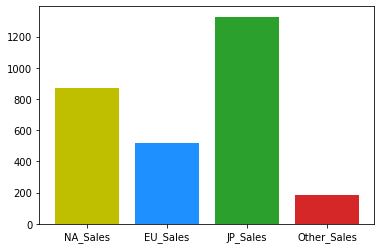

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(4)
ns = ['NA_Sales', 'EU_Sales', 'JP_Sales','Other_Sales']
sum = [873.55, 521.38, 1326.63,186.24]

colors = ['y', 'dodgerblue', 'C2','C3']

plt.bar(x, sum, color=colors)
plt.xticks(x, ns)

plt.show()

액션 장르는 일본, 북미, 유럽, 기타 국가 순으로 판매량이 높았다.

In [ ]:
dad=df.where(df['Genre'] == 'Adventure').dropna()

In [ ]:
f1[1]

'Adventure'

In [ ]:
dad['sum_sales']=dad['NA_Sales']+dad['EU_Sales']+dad['JP_Sales']+dad['Other_Sales']

In [ ]:
dad['NA_Sales'].sum()

105.74000000000001

In [ ]:
dad['EU_Sales'].sum()

63.73

In [ ]:
dad['JP_Sales'].sum()

111.86

In [ ]:
dad['Other_Sales'].sum()

16.83

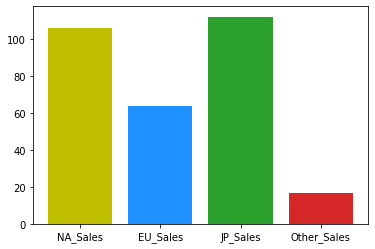

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(4)
ns = ['NA_Sales', 'EU_Sales', 'JP_Sales','Other_Sales']
sum = [105.74, 63.73, 111.86,16.83]

colors = ['y', 'dodgerblue', 'C2','C3']

plt.bar(x, sum, color=colors)
plt.xticks(x, ns)

plt.show()

In [ ]:
df['NA_Sales'].apply(lambda x: 'K' in x), 'NA_Sales'] *= 0.001

In [ ]:
k

0        False
1        False
2        False
3        False
4        False
         ...  
16593    False
16594    False
16595    False
16596    False
16597    False
Name: NA_Sales, Length: 16598, dtype: bool

In [ ]:
k

0        False
1        False
2        False
3        False
4        False
         ...  
16593    False
16594    False
16595    False
16596    False
16597    False
Name: NA_Sales, Length: 16598, dtype: bool

In [ ]:
d

10         0.01
45        60.00
145        0.00
878        0.00
1086       0.00
          ...  
15647      0.00
16194    120.00
16330    720.00
16492    470.00
16578    320.00
Name: NA_Sales, Length: 100, dtype: float64

In [ ]:
d=df[k]['NA_Sales']

In [ ]:
print(type(d))

<class 'pandas.core.series.Series'>


In [ ]:
d=d.values.tolist()

In [ ]:
d.index()

TypeError: ignored

In [ ]:
df.loc[d]

KeyError: ignored

In [ ]:
d.index

Int64Index([   10,    45,   145,   878,  1086,  1359,  1456,  1475,  1838,
             1922,  1964,  1971,  2673,  2924,  3262,  3328,  3498,  4471,
             4617,  4978,  5032,  5175,  5284,  5296,  5334,  5768,  6055,
             6086,  6115,  6150,  6153,  6203,  6545,  6595,  6694,  6929,
             7023,  7049,  7109,  7192,  7403,  7435,  7774,  7881,  8134,
             8189,  8235,  8239,  8579,  8689,  8842,  8872,  9020,  9257,
             9437,  9456,  9566,  9791,  9829, 10301, 10357, 10358, 10544,
            10823, 11563, 11992, 11996, 12107, 12158, 12240, 12332, 12410,
            12517, 12745, 12876, 13057, 13341, 13557, 13798, 13887, 13935,
            14180, 14292, 14347, 14410, 14446, 14630, 14757, 15088, 15107,
            15111, 15340, 15430, 15597, 15622, 15647, 16194, 16330, 16492,
            16578],
           dtype='int64')

In [ ]:
d

10         0.01
45        60.00
145        0.00
878        0.00
1086       0.00
          ...  
15647      0.00
16194    120.00
16330    720.00
16492    470.00
16578    320.00
Name: NA_Sales, Length: 100, dtype: float64

In [ ]:
df['NA_Sales'].insert(0, 1)

AttributeError: ignored

In [ ]:
df['NA_Sales']

0        0.04
1        0.17
2        0.00
3        0.04
4        0.12
         ... 
16593    0.15
16594    0.01
16595    0.44
16596    0.05
16597    0.00
Name: NA_Sales, Length: 16598, dtype: float64

In [ ]:
si=df[k]['NA_Sales']

In [ ]:
print(type(si))

<class 'pandas.core.series.Series'>


In [ ]:
si.index

Int64Index([   10,    45,   145,   878,  1086,  1359,  1456,  1475,  1838,
             1922,  1964,  1971,  2673,  2924,  3262,  3328,  3498,  4471,
             4617,  4978,  5032,  5175,  5284,  5296,  5334,  5768,  6055,
             6086,  6115,  6150,  6153,  6203,  6545,  6595,  6694,  6929,
             7023,  7049,  7109,  7192,  7403,  7435,  7774,  7881,  8134,
             8189,  8235,  8239,  8579,  8689,  8842,  8872,  9020,  9257,
             9437,  9456,  9566,  9791,  9829, 10301, 10357, 10358, 10544,
            10823, 11563, 11992, 11996, 12107, 12158, 12240, 12332, 12410,
            12517, 12745, 12876, 13057, 13341, 13557, 13798, 13887, 13935,
            14180, 14292, 14347, 14410, 14446, 14630, 14757, 15088, 15107,
            15111, 15340, 15430, 15597, 15622, 15647, 16194, 16330, 16492,
            16578],
           dtype='int64')

In [ ]:
b.insert(si,d)

TypeError: ignored

In [ ]:
sibal2[d] = d

TypeError: ignored

In [ ]:
sibal2

[0.04,
 0.17,
 0.0,
 0.04,
 0.12,
 0.0,
 0.02,
 0.07,
 0.0,
 0.04,
 480.0,
 0.14,
 0.0,
 0.02,
 0.0,
 0.14,
 0.01,
 0.0,
 0.02,
 0.0,
 0.57,
 0.06,
 0.08,
 0.0,
 0.48,
 0.02,
 0.03,
 0.0,
 0.0,
 0.14,
 0.05,
 1.93,
 0.12,
 0.0,
 0.29,
 0.19,
 0.3,
 0.26,
 0.11,
 0.18,
 0.3,
 0.0,
 0.33,
 0.0,
 0.51,
 60.0,
 0.0,
 0.06,
 0.13,
 0.14,
 0.52,
 0.18,
 0.0,
 0.34,
 0.05,
 0.25,
 0.0,
 0.0,
 0.41,
 0.18,
 0.02,
 0.25,
 0.13,
 0.08,
 0.01,
 0.0,
 0.52,
 0.04,
 0.08,
 0.18,
 0.22,
 0.03,
 0.08,
 0.22,
 0.01,
 0.08,
 0.0,
 0.35,
 0.1,
 0.0,
 0.08,
 0.1,
 0.0,
 0.19,
 0.13,
 0.17,
 0.0,
 0.08,
 0.13,
 0.22,
 0.07,
 0.17,
 0.67,
 0.05,
 0.0,
 0.07,
 0.02,
 0.59,
 0.36,
 0.0,
 0.0,
 0.18,
 0.0,
 0.05,
 0.21,
 0.06,
 0.19,
 1.19,
 0.0,
 0.0,
 0.0,
 0.01,
 0.0,
 0.04,
 0.04,
 0.0,
 0.04,
 0.0,
 0.03,
 0.0,
 0.0,
 0.07,
 5.91,
 0.04,
 0.0,
 0.0,
 1.98,
 0.04,
 0.0,
 0.02,
 0.13,
 0.0,
 0.0,
 0.02,
 0.35,
 0.07,
 0.0,
 0.12,
 0.04,
 0.18,
 0.0,
 0.0,
 0.0,
 0.09,
 0.06,
 0.0,
 0.5,
 0.17,
 0.0,
 0.94,

In [ ]:
d.index

Int64Index([   10,    45,   145,   878,  1086,  1359,  1456,  1475,  1838,
             1922,  1964,  1971,  2673,  2924,  3262,  3328,  3498,  4471,
             4617,  4978,  5032,  5175,  5284,  5296,  5334,  5768,  6055,
             6086,  6115,  6150,  6153,  6203,  6545,  6595,  6694,  6929,
             7023,  7049,  7109,  7192,  7403,  7435,  7774,  7881,  8134,
             8189,  8235,  8239,  8579,  8689,  8842,  8872,  9020,  9257,
             9437,  9456,  9566,  9791,  9829, 10301, 10357, 10358, 10544,
            10823, 11563, 11992, 11996, 12107, 12158, 12240, 12332, 12410,
            12517, 12745, 12876, 13057, 13341, 13557, 13798, 13887, 13935,
            14180, 14292, 14347, 14410, 14446, 14630, 14757, 15088, 15107,
            15111, 15340, 15430, 15597, 15622, 15647, 16194, 16330, 16492,
            16578],
           dtype='int64')

In [ ]:
sibal2

[0.04,
 0.17,
 0.0,
 0.04,
 0.12,
 0.0,
 0.02,
 0.07,
 0.0,
 0.04,
 480.0,
 0.14,
 0.0,
 0.02,
 0.0,
 0.14,
 0.01,
 0.0,
 0.02,
 0.0,
 0.57,
 0.06,
 0.08,
 0.0,
 0.48,
 0.02,
 0.03,
 0.0,
 0.0,
 0.14,
 0.05,
 1.93,
 0.12,
 0.0,
 0.29,
 0.19,
 0.3,
 0.26,
 0.11,
 0.18,
 0.3,
 0.0,
 0.33,
 0.0,
 0.51,
 60.0,
 0.0,
 0.06,
 0.13,
 0.14,
 0.52,
 0.18,
 0.0,
 0.34,
 0.05,
 0.25,
 0.0,
 0.0,
 0.41,
 0.18,
 0.02,
 0.25,
 0.13,
 0.08,
 0.01,
 0.0,
 0.52,
 0.04,
 0.08,
 0.18,
 0.22,
 0.03,
 0.08,
 0.22,
 0.01,
 0.08,
 0.0,
 0.35,
 0.1,
 0.0,
 0.08,
 0.1,
 0.0,
 0.19,
 0.13,
 0.17,
 0.0,
 0.08,
 0.13,
 0.22,
 0.07,
 0.17,
 0.67,
 0.05,
 0.0,
 0.07,
 0.02,
 0.59,
 0.36,
 0.0,
 0.0,
 0.18,
 0.0,
 0.05,
 0.21,
 0.06,
 0.19,
 1.19,
 0.0,
 0.0,
 0.0,
 0.01,
 0.0,
 0.04,
 0.04,
 0.0,
 0.04,
 0.0,
 0.03,
 0.0,
 0.0,
 0.07,
 5.91,
 0.04,
 0.0,
 0.0,
 1.98,
 0.04,
 0.0,
 0.02,
 0.13,
 0.0,
 0.0,
 0.02,
 0.35,
 0.07,
 0.0,
 0.12,
 0.04,
 0.18,
 0.0,
 0.0,
 0.0,
 0.09,
 0.06,
 0.0,
 0.5,
 0.17,
 0.0,
 0.94,

In [ ]:
(map(lambda x : x*0.001,df[k]['NA_Sales']))

In [ ]:
p=list(map(lambda x : x*0.001,df[k]['NA_Sales']))

In [ ]:
p

[1e-05,
 0.06,
 0.0,
 0.0,
 0.0,
 0.49,
 0.24,
 0.0,
 0.15,
 0.0,
 4.1,
 5.17,
 0.02,
 0.03,
 0.05,
 0.07,
 0.19,
 1.21,
 0.35000000000000003,
 1.61,
 0.1,
 0.0,
 0.17,
 1.21,
 0.0,
 0.04,
 0.02,
 0.06,
 0.0,
 0.15,
 0.0,
 0.45,
 0.0,
 0.22,
 0.31,
 1.61,
 0.8200000000000001,
 0.02,
 0.08,
 0.29,
 0.0,
 0.13,
 0.02,
 0.15,
 0.1,
 0.0,
 0.06,
 0.05,
 0.0,
 0.13,
 0.12,
 0.05,
 0.29,
 0.02,
 0.0,
 0.06,
 0.0,
 1.78,
 2.93,
 0.77,
 0.01,
 0.28,
 0.05,
 0.54,
 0.0,
 0.55,
 2.0100000000000002,
 0.0,
 0.1,
 0.0,
 0.01,
 0.0,
 0.77,
 0.02,
 0.34,
 0.09,
 0.22,
 0.6,
 0.09,
 0.13,
 2.57,
 0.03,
 0.04,
 0.09,
 0.04,
 0.0,
 0.0,
 0.0,
 0.27,
 0.42,
 0.0,
 0.0,
 0.28,
 0.0,
 0.03,
 0.0,
 0.12,
 0.72,
 0.47000000000000003,
 0.32]

In [ ]:
s.insert(si.index,d)

TypeError: ignored

In [ ]:
df[k]['NA_Sales']

10       480.0
45        60.0
145        0.0
878        0.0
1086       0.0
         ...  
15647      0.0
16194    120.0
16330    720.0
16492    470.0
16578    320.0
Name: NA_Sales, Length: 100, dtype: float64

In [ ]:
si

10       480.0
45        60.0
145        0.0
878        0.0
1086       0.0
         ...  
15647      0.0
16194    120.0
16330    720.0
16492    470.0
16578    320.0
Name: NA_Sales, Length: 100, dtype: float64

In [ ]:
print(type(d))

<class 'list'>


In [ ]:
d

TypeError: ignored

In [ ]:
si

10       480.0
45        60.0
145        0.0
878        0.0
1086       0.0
         ...  
15647      0.0
16194    120.0
16330    720.0
16492    470.0
16578    320.0
Name: NA_Sales, Length: 100, dtype: float64

In [ ]:
bal=si.values.tolist()

In [ ]:
s=df['NA_Sales'].values.tolist()

In [ ]:
s

[0.04,
 0.17,
 0.0,
 0.04,
 0.12,
 0.0,
 0.02,
 0.07,
 0.0,
 0.04,
 480.0,
 0.14,
 0.0,
 0.02,
 0.0,
 0.14,
 0.01,
 0.0,
 0.02,
 0.0,
 0.57,
 0.06,
 0.08,
 0.0,
 0.48,
 0.02,
 0.03,
 0.0,
 0.0,
 0.14,
 0.05,
 1.93,
 0.12,
 0.0,
 0.29,
 0.19,
 0.3,
 0.26,
 0.11,
 0.18,
 0.3,
 0.0,
 0.33,
 0.0,
 0.51,
 60.0,
 0.0,
 0.06,
 0.13,
 0.14,
 0.52,
 0.18,
 0.0,
 0.34,
 0.05,
 0.25,
 0.0,
 0.0,
 0.41,
 0.18,
 0.02,
 0.25,
 0.13,
 0.08,
 0.01,
 0.0,
 0.52,
 0.04,
 0.08,
 0.18,
 0.22,
 0.03,
 0.08,
 0.22,
 0.01,
 0.08,
 0.0,
 0.35,
 0.1,
 0.0,
 0.08,
 0.1,
 0.0,
 0.19,
 0.13,
 0.17,
 0.0,
 0.08,
 0.13,
 0.22,
 0.07,
 0.17,
 0.67,
 0.05,
 0.0,
 0.07,
 0.02,
 0.59,
 0.36,
 0.0,
 0.0,
 0.18,
 0.0,
 0.05,
 0.21,
 0.06,
 0.19,
 1.19,
 0.0,
 0.0,
 0.0,
 0.01,
 0.0,
 0.04,
 0.04,
 0.0,
 0.04,
 0.0,
 0.03,
 0.0,
 0.0,
 0.07,
 5.91,
 0.04,
 0.0,
 0.0,
 1.98,
 0.04,
 0.0,
 0.02,
 0.13,
 0.0,
 0.0,
 0.02,
 0.35,
 0.07,
 0.0,
 0.12,
 0.04,
 0.18,
 0.0,
 0.0,
 0.0,
 0.09,
 0.06,
 0.0,
 0.5,
 0.17,
 0.0,
 0.94,

In [ ]:
sibal=df['NA_Sales']

In [ ]:
sibal2.insert(o,d)

TypeError: ignored

In [ ]:
sibal2 = list(df.loc[:, 'NA_Sales'])

In [ ]:
print(type(d))

<class 'list'>


In [ ]:
d

[0.48,
 0.06,
 0.0,
 0.0,
 0.0,
 0.49,
 0.24,
 0.0,
 0.15,
 0.0,
 4.1,
 5.17,
 0.02,
 0.03,
 0.05,
 0.07,
 0.19,
 1.21,
 0.35000000000000003,
 1.61,
 0.1,
 0.0,
 0.17,
 1.21,
 0.0,
 0.04,
 0.02,
 0.06,
 0.0,
 0.15,
 0.0,
 0.45,
 0.0,
 0.22,
 0.31,
 1.61,
 0.8200000000000001,
 0.02,
 0.08,
 0.29,
 0.0,
 0.13,
 0.02,
 0.15,
 0.1,
 0.0,
 0.06,
 0.05,
 0.0,
 0.13,
 0.12,
 0.05,
 0.29,
 0.02,
 0.0,
 0.06,
 0.0,
 1.78,
 2.93,
 0.77,
 0.01,
 0.28,
 0.05,
 0.54,
 0.0,
 0.55,
 2.0100000000000002,
 0.0,
 0.1,
 0.0,
 0.01,
 0.0,
 0.77,
 0.02,
 0.34,
 0.09,
 0.22,
 0.6,
 0.09,
 0.13,
 2.57,
 0.03,
 0.04,
 0.09,
 0.04,
 0.0,
 0.0,
 0.0,
 0.27,
 0.42,
 0.0,
 0.0,
 0.28,
 0.0,
 0.03,
 0.0,
 0.12,
 0.72,
 0.47000000000000003,
 0.32]

In [ ]:
o

<function list.index(value, start=0, stop=9223372036854775807, /)>

In [ ]:
d

[0.48,
 0.06,
 0.0,
 0.0,
 0.0,
 0.49,
 0.24,
 0.0,
 0.15,
 0.0,
 4.1,
 5.17,
 0.02,
 0.03,
 0.05,
 0.07,
 0.19,
 1.21,
 0.35000000000000003,
 1.61,
 0.1,
 0.0,
 0.17,
 1.21,
 0.0,
 0.04,
 0.02,
 0.06,
 0.0,
 0.15,
 0.0,
 0.45,
 0.0,
 0.22,
 0.31,
 1.61,
 0.8200000000000001,
 0.02,
 0.08,
 0.29,
 0.0,
 0.13,
 0.02,
 0.15,
 0.1,
 0.0,
 0.06,
 0.05,
 0.0,
 0.13,
 0.12,
 0.05,
 0.29,
 0.02,
 0.0,
 0.06,
 0.0,
 1.78,
 2.93,
 0.77,
 0.01,
 0.28,
 0.05,
 0.54,
 0.0,
 0.55,
 2.0100000000000002,
 0.0,
 0.1,
 0.0,
 0.01,
 0.0,
 0.77,
 0.02,
 0.34,
 0.09,
 0.22,
 0.6,
 0.09,
 0.13,
 2.57,
 0.03,
 0.04,
 0.09,
 0.04,
 0.0,
 0.0,
 0.0,
 0.27,
 0.42,
 0.0,
 0.0,
 0.28,
 0.0,
 0.03,
 0.0,
 0.12,
 0.72,
 0.47000000000000003,
 0.32]

In [ ]:
o

Int64Index([   10,    45,   145,   878,  1086,  1359,  1456,  1475,  1838,
             1922,  1964,  1971,  2673,  2924,  3262,  3328,  3498,  4471,
             4617,  4978,  5032,  5175,  5284,  5296,  5334,  5768,  6055,
             6086,  6115,  6150,  6153,  6203,  6545,  6595,  6694,  6929,
             7023,  7049,  7109,  7192,  7403,  7435,  7774,  7881,  8134,
             8189,  8235,  8239,  8579,  8689,  8842,  8872,  9020,  9257,
             9437,  9456,  9566,  9791,  9829, 10301, 10357, 10358, 10544,
            10823, 11563, 11992, 11996, 12107, 12158, 12240, 12332, 12410,
            12517, 12745, 12876, 13057, 13341, 13557, 13798, 13887, 13935,
            14180, 14292, 14347, 14410, 14446, 14630, 14757, 15088, 15107,
            15111, 15340, 15430, 15597, 15622, 15647, 16194, 16330, 16492,
            16578],
           dtype='int64')

In [ ]:
sibal2

[0.04,
 0.17,
 0.0,
 0.04,
 0.12,
 0.0,
 0.02,
 0.07,
 0.0,
 0.04,
 480.0,
 0.14,
 0.0,
 0.02,
 0.0,
 0.14,
 0.01,
 0.0,
 0.02,
 0.0,
 0.57,
 0.06,
 0.08,
 0.0,
 0.48,
 0.02,
 0.03,
 0.0,
 0.0,
 0.14,
 0.05,
 1.93,
 0.12,
 0.0,
 0.29,
 0.19,
 0.3,
 0.26,
 0.11,
 0.18,
 0.3,
 0.0,
 0.33,
 0.0,
 0.51,
 60.0,
 0.0,
 0.06,
 0.13,
 0.14,
 0.52,
 0.18,
 0.0,
 0.34,
 0.05,
 0.25,
 0.0,
 0.0,
 0.41,
 0.18,
 0.02,
 0.25,
 0.13,
 0.08,
 0.01,
 0.0,
 0.52,
 0.04,
 0.08,
 0.18,
 0.22,
 0.03,
 0.08,
 0.22,
 0.01,
 0.08,
 0.0,
 0.35,
 0.1,
 0.0,
 0.08,
 0.1,
 0.0,
 0.19,
 0.13,
 0.17,
 0.0,
 0.08,
 0.13,
 0.22,
 0.07,
 0.17,
 0.67,
 0.05,
 0.0,
 0.07,
 0.02,
 0.59,
 0.36,
 0.0,
 0.0,
 0.18,
 0.0,
 0.05,
 0.21,
 0.06,
 0.19,
 1.19,
 0.0,
 0.0,
 0.0,
 0.01,
 0.0,
 0.04,
 0.04,
 0.0,
 0.04,
 0.0,
 0.03,
 0.0,
 0.0,
 0.07,
 5.91,
 0.04,
 0.0,
 0.0,
 1.98,
 0.04,
 0.0,
 0.02,
 0.13,
 0.0,
 0.0,
 0.02,
 0.35,
 0.07,
 0.0,
 0.12,
 0.04,
 0.18,
 0.0,
 0.0,
 0.0,
 0.09,
 0.06,
 0.0,
 0.5,
 0.17,
 0.0,
 0.94,

In [ ]:
print(type(sibal))

<class 'pandas.core.series.Series'>


In [ ]:
df['NA_Sales'] = df['NA_Sales'].astype(str).str.replace('K', '')
df.loc[df['NA_Sales'].apply(lambda x: 'K' in x), 'NA_Sales'] *= 0.001

In [ ]:
d

[0.48,
 0.06,
 0.0,
 0.0,
 0.0,
 0.49,
 0.24,
 0.0,
 0.15,
 0.0,
 4.1,
 5.17,
 0.02,
 0.03,
 0.05,
 0.07,
 0.19,
 1.21,
 0.35000000000000003,
 1.61,
 0.1,
 0.0,
 0.17,
 1.21,
 0.0,
 0.04,
 0.02,
 0.06,
 0.0,
 0.15,
 0.0,
 0.45,
 0.0,
 0.22,
 0.31,
 1.61,
 0.8200000000000001,
 0.02,
 0.08,
 0.29,
 0.0,
 0.13,
 0.02,
 0.15,
 0.1,
 0.0,
 0.06,
 0.05,
 0.0,
 0.13,
 0.12,
 0.05,
 0.29,
 0.02,
 0.0,
 0.06,
 0.0,
 1.78,
 2.93,
 0.77,
 0.01,
 0.28,
 0.05,
 0.54,
 0.0,
 0.55,
 2.0100000000000002,
 0.0,
 0.1,
 0.0,
 0.01,
 0.0,
 0.77,
 0.02,
 0.34,
 0.09,
 0.22,
 0.6,
 0.09,
 0.13,
 2.57,
 0.03,
 0.04,
 0.09,
 0.04,
 0.0,
 0.0,
 0.0,
 0.27,
 0.42,
 0.0,
 0.0,
 0.28,
 0.0,
 0.03,
 0.0,
 0.12,
 0.72,
 0.47000000000000003,
 0.32]

In [ ]:
i=df[k]['NA_Sales']

In [ ]:
i

10         0.01
45        60.00
145        0.00
878        0.00
1086       0.00
          ...  
15647      0.00
16194    120.00
16330    720.00
16492    470.00
16578    320.00
Name: NA_Sales, Length: 100, dtype: float64

In [ ]:
df[k]['NA_Sales']

10       480.0
45        60.0
145        0.0
878        0.0
1086       0.0
         ...  
15647      0.0
16194    120.0
16330    720.0
16492    470.0
16578    320.0
Name: NA_Sales, Length: 100, dtype: float64

In [ ]:
df

,Unnamed: 0,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,1,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,2,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
3,4,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
4,5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04
...,...,...,...,...,...,...,...,...,...,...
16593,16594,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,0.15,0.04,0,0.01
16594,16595,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,0.01,0,0,0
16595,16596,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16596,16597,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,0.05,0.05,0.25,0.03


In [ ]:
df['NA_Sales']

0        nan
1        nan
2        nan
3        nan
4        nan
        ... 
16593    nan
16594    nan
16595    nan
16596    nan
16597    nan
Name: NA_Sales, Length: 16598, dtype: object

In [ ]:
df

,Unnamed: 0,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,1,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,2,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
3,4,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
4,5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04
...,...,...,...,...,...,...,...,...,...,...
16593,16594,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,0.15,0.04,0,0.01
16594,16595,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,0.01,0,0,0
16595,16596,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16596,16597,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,0.05,0.05,0.25,0.03


In [ ]:
df.loc[df['NA_Sales'].apply(lambda x: 'K' in x), 'NA_Sales'] *= 0.001

In [ ]:
df.loc[df['NA_Sales'].apply(lambda x: 'K' in x),'test'] *= 0.001

In [ ]:
df['NA_Sales']=df['NA_Sales'].str.replace(r'M', '', regex=True)

In [ ]:
df.loc[9]

Unnamed: 0                                                    10
Name           The Penguins of Madagascar: Dr. Blowhole Retur...
Platform                                                     PS3
Year                                                      2011.0
Genre                                                     Action
Publisher                                                    THQ
NA_Sales                                                    0.04
EU_Sales                                                    0.03
JP_Sales                                                       0
Other_Sales                                                 0.01
Name: 9, dtype: object

In [ ]:
df['test']=df['NA_Sales'].str.contains('K')

In [ ]:
d=df['NA_Sales'].str.contains('K')

In [ ]:
df[d]

,Unnamed: 0,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,test
10,11,Ford Racing,PS,2001.0,Racing,Empire Interactive,480K,0.33M,0K,0.06,0.001
45,46,Resident Evil: Revelations 2,PS3,2015.0,Action,Capcom,60K,0.08,0.16,0.03,0.001
145,146,TOCA Race Driver 3,PC,2006.0,Racing,Codemasters,0K,0.02,0,0,0.001
878,879,Tears to Tiara Anecdotes: The Secret of Avalon,PS3,2009.0,Strategy,Aqua Plus,0K,0,0.04,0,0.001
1086,1087,Pro Evolution Soccer 2014,3DS,2013.0,Action,Konami Digital Entertainment,0K,0,0.19,0,0.001
...,...,...,...,...,...,...,...,...,...,...,...
15647,15648,Championship Manager 2010,PC,2009.0,Sports,Eidos Interactive,0K,0.01,0,0,0.001
16194,16195,Vin Diesel: Wheelman,PS3,2009.0,Racing,Ubisoft,120K,0.15,0,0.06,0.001
16330,16331,Midway Arcade Treasures,PS2,2003.0,Misc,Midway Games,720K,0.56,0,0.19,0.001
16492,16493,Mortal Kombat,PSV,2012.0,Fighting,Warner Bros. Interactive Entertainment,470K,0.18,0,0.12,0.001


In [ ]:
K

0        False
1        False
2        False
3        False
4        False
         ...  
16593    False
16594    False
16595    False
16596    False
16597    False
Name: NA_Sales, Length: 16598, dtype: bool

In [ ]:
df[k].index

Int64Index([   10,    45,   145,   878,  1086,  1359,  1456,  1475,  1838,
             1922,  1964,  1971,  2673,  2924,  3262,  3328,  3498,  4471,
             4617,  4978,  5032,  5175,  5284,  5296,  5334,  5768,  6055,
             6086,  6115,  6150,  6153,  6203,  6545,  6595,  6694,  6929,
             7023,  7049,  7109,  7192,  7403,  7435,  7774,  7881,  8134,
             8189,  8235,  8239,  8579,  8689,  8842,  8872,  9020,  9257,
             9437,  9456,  9566,  9791,  9829, 10301, 10357, 10358, 10544,
            10823, 11563, 11992, 11996, 12107, 12158, 12240, 12332, 12410,
            12517, 12745, 12876, 13057, 13341, 13557, 13798, 13887, 13935,
            14180, 14292, 14347, 14410, 14446, 14630, 14757, 15088, 15107,
            15111, 15340, 15430, 15597, 15622, 15647, 16194, 16330, 16492,
            16578],
           dtype='int64')

In [ ]:
df[K]

TypeError: ignored

In [ ]:
df[test]['NA_Sales']

10       480
45        60
145        0
878        0
1086       0
        ... 
15647      0
16194    120
16330    720
16492    470
16578    320
Name: NA_Sales, Length: 100, dtype: object

In [ ]:
df[test]['NA_Sales'].str.replace(r'[a-zA-Z]', '', regex=True)

10        480
45         60
145         0
447      0.58
458      0.25
         ... 
16330     720
16408    0.53
16482       0
16492     470
16578     320
Name: NA_Sales, Length: 200, dtype: object

In [ ]:
df=df.drop(['test'],axis=1)

In [ ]:
df

,Unnamed: 0,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,1,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,2,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
3,4,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
4,5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04
...,...,...,...,...,...,...,...,...,...,...
16593,16594,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,0.15,0.04,0,0.01
16594,16595,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,0.01,0,0,0
16595,16596,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16596,16597,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,0.05,0.05,0.25,0.03


In [ ]:
df['100000'] = 100000

In [ ]:
df['1'] = df[test]['NA_Sales'] * df['100000']

In [ ]:
df['test']=df['test'].dropna()

In [ ]:
df['test']

0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
        ... 
16593    NaN
16594    NaN
16595    NaN
16596    NaN
16597    NaN
Name: test, Length: 16598, dtype: object

In [ ]:
df.dropna(subset = ['test'],inplace = True)

In [ ]:
df

,Unnamed: 0,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,test,100000
0,1,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0,NaN,100000
1,2,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01,NaN,100000
2,3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0,NaN,100000
3,4,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0,NaN,100000
4,5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04,NaN,100000
...,...,...,...,...,...,...,...,...,...,...,...,...
16593,16594,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,0.15,0.04,0,0.01,NaN,100000
16594,16595,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,0.01,0,0,0,NaN,100000
16595,16596,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13,NaN,100000
16596,16597,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,0.05,0.05,0.25,0.03,NaN,100000


In [ ]:
df


,Unnamed: 0,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,test,100000
10,11,Ford Racing,PS,2001.0,Racing,Empire Interactive,480K,0.33M,0K,0.06,480,100000
45,46,Resident Evil: Revelations 2,PS3,2015.0,Action,Capcom,60K,0.08,0.16,0.03,60,100000
145,146,TOCA Race Driver 3,PC,2006.0,Racing,Codemasters,0K,0.02,0,0,0,100000
878,879,Tears to Tiara Anecdotes: The Secret of Avalon,PS3,2009.0,Strategy,Aqua Plus,0K,0,0.04,0,0,100000
1086,1087,Pro Evolution Soccer 2014,3DS,2013.0,Action,Konami Digital Entertainment,0K,0,0.19,0,0,100000
...,...,...,...,...,...,...,...,...,...,...,...,...
15647,15648,Championship Manager 2010,PC,2009.0,Sports,Eidos Interactive,0K,0.01,0,0,0,100000
16194,16195,Vin Diesel: Wheelman,PS3,2009.0,Racing,Ubisoft,120K,0.15,0,0.06,120,100000
16330,16331,Midway Arcade Treasures,PS2,2003.0,Misc,Midway Games,720K,0.56,0,0.19,720,100000
16492,16493,Mortal Kombat,PSV,2012.0,Fighting,Warner Bros. Interactive Entertainment,470K,0.18,0,0.12,470,100000


In [ ]:
df[test].index

Int64Index([   10,    45,   145,   878,  1086,  1359,  1456,  1475,  1838,
             1922,  1964,  1971,  2673,  2924,  3262,  3328,  3498,  4471,
             4617,  4978,  5032,  5175,  5284,  5296,  5334,  5768,  6055,
             6086,  6115,  6150,  6153,  6203,  6545,  6595,  6694,  6929,
             7023,  7049,  7109,  7192,  7403,  7435,  7774,  7881,  8134,
             8189,  8235,  8239,  8579,  8689,  8842,  8872,  9020,  9257,
             9437,  9456,  9566,  9791,  9829, 10301, 10357, 10358, 10544,
            10823, 11563, 11992, 11996, 12107, 12158, 12240, 12332, 12410,
            12517, 12745, 12876, 13057, 13341, 13557, 13798, 13887, 13935,
            14180, 14292, 14347, 14410, 14446, 14630, 14757, 15088, 15107,
            15111, 15340, 15430, 15597, 15622, 15647, 16194, 16330, 16492,
            16578],
           dtype='int64')

In [ ]:
df.drop(index = df[test].index)

,Unnamed: 0,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,1,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,2,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
3,4,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
4,5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04
...,...,...,...,...,...,...,...,...,...,...
16593,16594,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,0.15,0.04,0,0.01
16594,16595,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,0.01,0,0,0
16595,16596,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16596,16597,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,0.05,0.05,0.25,0.03


In [ ]:
df

,Unnamed: 0,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,test,100000,1
10,11,Ford Racing,PS,2001.0,Racing,Empire Interactive,480K,0.33M,0K,0.06,480,100000,480K480K480K480K480K480K480K480K480K480K480K48...
45,46,Resident Evil: Revelations 2,PS3,2015.0,Action,Capcom,60K,0.08,0.16,0.03,60,100000,60K60K60K60K60K60K60K60K60K60K60K60K60K60K60K6...
145,146,TOCA Race Driver 3,PC,2006.0,Racing,Codemasters,0K,0.02,0,0,0,100000,0K0K0K0K0K0K0K0K0K0K0K0K0K0K0K0K0K0K0K0K0K0K0K...
878,879,Tears to Tiara Anecdotes: The Secret of Avalon,PS3,2009.0,Strategy,Aqua Plus,0K,0,0.04,0,0,100000,0K0K0K0K0K0K0K0K0K0K0K0K0K0K0K0K0K0K0K0K0K0K0K...
1086,1087,Pro Evolution Soccer 2014,3DS,2013.0,Action,Konami Digital Entertainment,0K,0,0.19,0,0,100000,0K0K0K0K0K0K0K0K0K0K0K0K0K0K0K0K0K0K0K0K0K0K0K...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15647,15648,Championship Manager 2010,PC,2009.0,Sports,Eidos Interactive,0K,0.01,0,0,0,100000,0K0K0K0K0K0K0K0K0K0K0K0K0K0K0K0K0K0K0K0K0K0K0K...
16194,16195,Vin Diesel: Wheelman,PS3,2009.0,Racing,Ubisoft,120K,0.15,0,0.06,120,100000,120K120K120K120K120K120K120K120K120K120K120K12...
16330,16331,Midway Arcade Treasures,PS2,2003.0,Misc,Midway Games,720K,0.56,0,0.19,720,100000,720K720K720K720K720K720K720K720K720K720K720K72...
16492,16493,Mortal Kombat,PSV,2012.0,Fighting,Warner Bros. Interactive Entertainment,470K,0.18,0,0.12,470,100000,470K470K470K470K470K470K470K470K470K470K470K47...


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 10 to 16578
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   100 non-null    int64  
 1   Name         100 non-null    object 
 2   Platform     100 non-null    object 
 3   Year         100 non-null    float64
 4   Genre        100 non-null    object 
 5   Publisher    100 non-null    object 
 6   NA_Sales     100 non-null    object 
 7   EU_Sales     100 non-null    object 
 8   JP_Sales     100 non-null    object 
 9   Other_Sales  100 non-null    object 
 10  test         100 non-null    object 
 11  100000       100 non-null    int64  
 12  1            100 non-null    object 
dtypes: float64(1), int64(2), object(10)
memory usage: 10.9+ KB


In [ ]:
df['test']=df['test'].astype('float')

ValueError: ignored

In [ ]:
df['test'] = df.test.str.replace(r'[a-zA-Z]', '', regex=True)

In [ ]:
df

,Unnamed: 0,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,test,100000,1
10,11,Ford Racing,PS,2001.0,Racing,Empire Interactive,480K,0.33M,0K,0.06,,100000,480K480K480K480K480K480K480K480K480K480K480K48...
45,46,Resident Evil: Revelations 2,PS3,2015.0,Action,Capcom,60K,0.08,0.16,0.03,,100000,60K60K60K60K60K60K60K60K60K60K60K60K60K60K60K6...
145,146,TOCA Race Driver 3,PC,2006.0,Racing,Codemasters,0K,0.02,0,0,,100000,0K0K0K0K0K0K0K0K0K0K0K0K0K0K0K0K0K0K0K0K0K0K0K...
878,879,Tears to Tiara Anecdotes: The Secret of Avalon,PS3,2009.0,Strategy,Aqua Plus,0K,0,0.04,0,,100000,0K0K0K0K0K0K0K0K0K0K0K0K0K0K0K0K0K0K0K0K0K0K0K...
1086,1087,Pro Evolution Soccer 2014,3DS,2013.0,Action,Konami Digital Entertainment,0K,0,0.19,0,,100000,0K0K0K0K0K0K0K0K0K0K0K0K0K0K0K0K0K0K0K0K0K0K0K...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15647,15648,Championship Manager 2010,PC,2009.0,Sports,Eidos Interactive,0K,0.01,0,0,,100000,0K0K0K0K0K0K0K0K0K0K0K0K0K0K0K0K0K0K0K0K0K0K0K...
16194,16195,Vin Diesel: Wheelman,PS3,2009.0,Racing,Ubisoft,120K,0.15,0,0.06,,100000,120K120K120K120K120K120K120K120K120K120K120K12...
16330,16331,Midway Arcade Treasures,PS2,2003.0,Misc,Midway Games,720K,0.56,0,0.19,,100000,720K720K720K720K720K720K720K720K720K720K720K72...
16492,16493,Mortal Kombat,PSV,2012.0,Fighting,Warner Bros. Interactive Entertainment,470K,0.18,0,0.12,,100000,470K470K470K470K470K470K470K470K470K470K470K47...


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 10 to 16578
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   100 non-null    int64  
 1   Name         100 non-null    object 
 2   Platform     100 non-null    object 
 3   Year         100 non-null    float64
 4   Genre        100 non-null    object 
 5   Publisher    100 non-null    object 
 6   NA_Sales     100 non-null    object 
 7   EU_Sales     100 non-null    object 
 8   JP_Sales     100 non-null    object 
 9   Other_Sales  100 non-null    object 
 10  test         100 non-null    object 
 11  100000       100 non-null    int64  
 12  1            100 non-null    object 
dtypes: float64(1), int64(2), object(10)
memory usage: 10.9+ KB


In [ ]:
df.drop(columns

<ipython-input-90-2558a8bf3736>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df['1'] = df[test]['NA_Sales'] * df['100000']


In [ ]:
#NA_Sales 컬럼 내 문자타입 전부 제거

df['NA_Sales'] = df.NA_Sales.str.replace(r'[a-zA-Z]', '', regex=True)


In [ ]:
#EU_Sales 컬럼 내 문자타입 전부 제거

df['EU_Sales'] = df.EU_Sales.str.replace(r'[a-zA-Z]', '', regex=True)

In [ ]:
#JP_Sales 컬럼 내 문자타입 전부 제거

df['JP_Sales'] = df.JP_Sales.str.replace(r'[a-zA-Z]', '', regex=True)

In [ ]:
#Other_Sales 컬럼 내 문자타입 전부 제거

df['Other_Sales'] = df.Other_Sales.str.replace(r'[a-zA-Z]', '', regex=True)

In [ ]:
#NA_Sales 컬럼 데이터 타입 정수로 변경
df['NA_Sales'] = df['NA_Sales'].astype('float')

In [ ]:
#EU_Sales 컬럼 데이터 타입 정수로 변경
df['EU_Sales'] = df['EU_Sales'].astype('float')

In [ ]:
#JP_Sales 컬럼 데이터 타입 정수로 변경
df['JP_Sales'] = df['JP_Sales'].astype('float')

In [ ]:
#Other_Sales 컬럼 데이터 타입 정수로 변경
df['Other_Sales'] = df['Other_Sales'].astype('float')

In [ ]:
# 필요없는 행 (Unnamed:0) 삭제
df.drop('Unnamed: 0', axis = 1, inplace = True)
df.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0.00,0.00,0.00
1,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0.00,0.00,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0.00,0.00,0.02,0.00
3,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0.00,0.00,0.00
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0.00,0.04


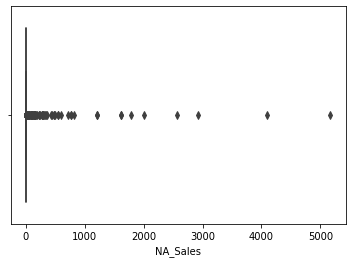

In [ ]:
sns.boxplot(x=df.NA_Sales);

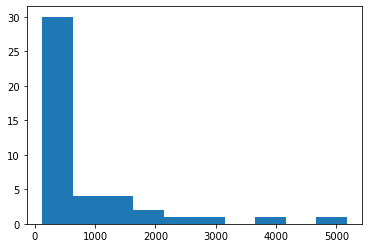

In [ ]:
plt.hist(df.NA_Sales[df.NA_Sales > 100]);

In [ ]:
# 각 지역별 판매량이 1보다 큰 값들은 전부 삭제해줌 (좋지 않은 방법이지만 내 최선임)

In [ ]:
len(df[df.NA_Sales>11])

84

In [ ]:
len(df[df.NA_Sales<1])

15624

In [ ]:
df = df.drop(index = df[df["NA_Sales"] >10].index)

In [ ]:
len(df[df.EU_Sales>10])

0

In [ ]:
df = df.drop(index = df[df["EU_Sales"] >10].index)

In [ ]:
len(df[df.JP_Sales>1])

165

In [ ]:
df = df.drop(index = df[df["JP_Sales"] >10].index)

In [ ]:
len(df[df.Other_Sales>1])

62

In [ ]:
df = df.drop(index = df[df["Other_Sales"] >10].index)

In [ ]:
#연도 결측치 추출
missing_year = df[df['Year'].isnull()]

In [ ]:
missing_year

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales


In [ ]:
#연도 결측치 데이터의 Name 중복값 확인
test1=missing_year[missing_year['Name'].duplicated()]

In [ ]:
test1

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
2552,The Golden Compass,PSP,NaN,Action,Sega,0.11,160K,0,0.1
4124,WRC: FIA World Rally Championship,X360,NaN,Racing,Black Bean Games,0,0.1,0,0.02
4181,Rock Band,Wii,NaN,Misc,MTV Games,1.35,0.56,0,0.2
6223,Rock Revolution,PS3,NaN,Misc,Unknown,0.25,0,0,0.02
7131,WRC: FIA World Rally Championship,PC,NaN,Racing,Black Bean Games,0,0.01,0,0
8076,Happy Feet Two,PS3,NaN,Action,Warner Bros. Interactive Entertainment,0.09,0.01,0,0.01
8812,Combat Elite: WWII Paratroopers,XB,NaN,Shooter,Unknown,0.02,0.01,0,0
9184,Wii de Asobu: Metroid Prime,Wii,NaN,Shooter,Nintendo,0,0,0.02,0
9240,LEGO Harry Potter: Years 5-7,Wii,NaN,Action,Warner Bros. Interactive Entertainment,0.76,0.47,0,0.13
9298,Battle vs. Chess,PC,NaN,Misc,TopWare Interactive,0,0.02,0,0.01


In [ ]:
len(test1)

38

In [ ]:
df[df['Name'] == 'The Golden Compass']=df[df['Name'] == 'The Golden Compass'].fillna(2007.0	)

In [ ]:
df[df['Name'] == 'The Golden Compass']

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
2056,The Golden Compass,Wii,NaN,Action,Sega,0.26,0.28,0,0.07
2552,The Golden Compass,PSP,NaN,Action,Sega,0.11,160K,0,0.1
5034,The Golden Compass,PS3,2007.0,Action,Sega,0.14,0.1,0,0.05
5258,The Golden Compass,DS,2007.0,Action,Sega,0.28,0.25,0,0.06
10880,The Golden Compass,PS2,2007.0,Action,Sega,0.13,0,0,0.39
16031,The Golden Compass,X360,2007.0,Action,Sega,0.3,0.12,0,0.04


In [ ]:
f

In [ ]:
#결측치 데이터 중 고유 이름 컬럼과 갯수 확인
year = missing_year['Name'].unique()
num = missing_year['Name'].nunique()

In [ ]:
year

array(['Rock Band', "Yu-Gi-Oh! 5D's Wheelie Breakers (JP sales)",
       'Jewel Link Chronicles: Mountains of Madness',
       'Majesty 2: The Fantasy Kingdom Sim', 'Famista 64',
       'Transworld Surf', 'Battle vs. Chess', 'Major League Baseball 2K6',
       'Twisted Metal: Small Brawl', 'Tiger Woods PGA Tour 07',
       'Tribes: Aerial Assault', 'Metal Gear Solid 2: Substance',
       'Star Trek: Legacy', 'My Healthy Cooking Coach',
       'Mega Man X Collection', 'Move Fitness', "Flip's Twisted World",
       'Super Puzzle Fighter II', 'Luminous Arc 2 (JP sales)',
       'Tomb Raider (2013)', 'Street Fighter IV',
       'Agarest Senki: Re-appearance', 'Monster Hunter Frontier Online',
       'Harvest Moon: Save the Homeland', 'NHL Hitz Pro',
       'Final Fantasy XI', 'The Golden Compass', 'Shorts',
       'World of Tanks', 'Call of Duty 3', 'Madden NFL 06',
       'Dinotopia: The Sunstone Odyssey', 'Virtua Quest',
       'Captain America: Super Soldier',
       'Writing and Speaki

In [ ]:
num

233

In [ ]:
# Year 존재하는 데이터만 확인
yesYear = df.copy()
yesYear = yesYear.dropna(subset=['Year'])

In [ ]:
# 동일 Year 존재 여부 확인
have_Year = []

for data in yesYear['Name']:
    if data in year:
        have_Year.append(data)

In [ ]:
len(have_Year)

206

In [ ]:
yesYear

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
3,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04
...,...,...,...,...,...,...,...,...,...
16593,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,0.15,0.04,0,0.01
16594,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,0.01,0,0,0
16595,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16596,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,0.05,0.05,0.25,0.03


In [ ]:
d2=df[['Name','Year']]

In [ ]:
d2[d2.Year.isnull()].index

Int64Index([   31,   109,   273,   358,   430,   548,   675,   808,   818,
              952,
            ...
            15805, 15897, 16053, 16130, 16195, 16240, 16275, 16278, 16425,
            16432],
           dtype='int64', length=271)

In [ ]:
df.groupby('Name')['Year'].mean()

Name
'98 Koshien                                1998.0
.hack//G.U. Vol.1//Rebirth                 2006.0
.hack//G.U. Vol.2//Reminisce               2006.0
.hack//G.U. Vol.2//Reminisce (jp sales)    2006.0
.hack//G.U. Vol.3//Redemption              2007.0
                                            ...  
thinkSMART: Chess for Kids                 2011.0
uDraw Studio                               2010.0
uDraw Studio: Instant Artist               2011.0
wwe Smackdown vs. Raw 2006                    NaN
¡Shin Chan Flipa en colores!               2007.0
Name: Year, Length: 11493, dtype: float64

In [ ]:
df.describe()

,Year
count,16327.000000
mean,1994.242543
std,155.077168
min,0.000000
25%,2003.000000
50%,2007.000000
75%,2010.000000
max,2020.000000


In [ ]:
d11

0        False
1        False
2        False
3        False
4        False
         ...  
16593    False
16594    False
16595    False
16596    False
16597    False
Name: Year, Length: 16598, dtype: bool

In [ ]:
d3['Name']

31                                         Rock Band
109       Yu-Gi-Oh! 5D's Wheelie Breakers (JP sales)
273      Jewel Link Chronicles: Mountains of Madness
358               Majesty 2: The Fantasy Kingdom Sim
430                                       Famista 64
                            ...                     
16240                                  Freaky Flyers
16275                                 Space Invaders
16278                                  Madden NFL 11
16425                                 Yoostar on MTV
16432                                    Bejeweled 3
Name: Name, Length: 271, dtype: object

In [ ]:
d=yesYear['Name'].isin(have_Year)

In [ ]:
test=yesYear[d]

In [ ]:
test[['Name','Year']]

,Name,Year
27,World of Tanks,2011.0
182,Madden NFL 07,2006.0
383,Madden NFL 07,2006.0
422,Shrek the Third,2007.0
482,Madden NFL 2002,2001.0
...,...,...
16031,The Golden Compass,2007.0
16056,Space Invaders,2002.0
16250,Teen Titans,2006.0
16351,National Geographic Challenge!,2011.0


In [ ]:
test['Name']

27                       World of Tanks
182                       Madden NFL 07
383                       Madden NFL 07
422                     Shrek the Third
482                     Madden NFL 2002
                      ...              
16031                The Golden Compass
16056                    Space Invaders
16250                       Teen Titans
16351    National Geographic Challenge!
16381                     Madden NFL 07
Name: Name, Length: 206, dtype: object

In [ ]:
# Year 결측치 값 대체할 수 있는 Name 컬럼 
have_Year=have_Year.array

AttributeError: ignored

In [ ]:
len(have_Year)

206

In [ ]:
#결측치 별로 안 중요한 것 같음. 무시하도록 함.

In [ ]:
df['Year'].fillna(0)

0        2008.0
1        2009.0
2        2010.0
3        2010.0
4        2010.0
          ...  
16593    2006.0
16594    2005.0
16595    2015.0
16596    2013.0
16597    1996.0
Name: Year, Length: 16598, dtype: float64

In [ ]:
df.isnull().sum()

Name             0
Platform         0
Year           271
Genre           50
Publisher       58
NA_Sales         0
EU_Sales         0
JP_Sales         0
Other_Sales      0
dtype: int64

In [ ]:
df.shape

(16598, 9)

In [ ]:
df['NA_Sales']

0        0.04
1        0.17
2           0
3        0.04
4        0.12
         ... 
16593    0.15
16594    0.01
16595    0.44
16596    0.05
16597       0
Name: NA_Sales, Length: 16598, dtype: object

In [ ]:
df.groupby('Name')['NA_Sales'].mean()

TypeError: ignored

In [ ]:
df.loc[340]

Name           Fate/Stay Night [Réalta Nua]
Platform                                PS2
Year                                 2007.0
Genre                             Adventure
Publisher                   Kadokawa Shoten
NA_Sales                                  0
EU_Sales                                  0
JP_Sales                               0.17
Other_Sales                               0
Name: 340, dtype: object

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         16598 non-null  object 
 1   Platform     16598 non-null  object 
 2   Year         16329 non-null  float64
 3   Genre        16548 non-null  object 
 4   Publisher    16540 non-null  object 
 5   NA_Sales     16598 non-null  object 
 6   EU_Sales     16598 non-null  object 
 7   JP_Sales     16598 non-null  object 
 8   Other_Sales  16598 non-null  object 
dtypes: float64(1), object(8)
memory usage: 1.1+ MB


In [ ]:
#NA_Sales 컬럼 내 문자타입 전부 제거

df['NA_Sales'] = df.NA_Sales.str.replace(r'[a-zA-Z]', '', regex=True)


In [ ]:
import re

def has_errors(inputString):
  return bool(re.search('[^.\d+]', inputString))

In [ ]:
# 이름에 섞여 있는 오류 데이터를 확인
error_condition = df.NA_Sales.apply(has_errors)
error_names = df[error_condition]
error_names

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales


In [ ]:
df['NA_Sales'].astype(int)

ValueError: ignored

In [ ]:
df.NA_Sales.sort_values()

8298        0
7892        0
7891        0
7889        0
7879        0
         ... 
6248     9.67
10650    9.81
14347      90
13798      90
13057      90
Name: NA_Sales, Length: 16598, dtype: object

In [ ]:
90K=df[df.NA_Sales='90K']

SyntaxError: ignored

In [ ]:
less10_over100 = patients[(patients.체질량지수 < 10) | (patients.체질량지수 > 100)]

In [ ]:
import re

def has_errors(inputString):
  return bool(re.search('[_!.\d+]', inputString))